In [21]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import os

In [27]:
cwd=os.getcwd()

path_data = cwd + '/HzTable_MM_BC32.txt'
path_sys = cwd + '/data_MM20.dat'

data= np.genfromtxt(path_data)
z = data[:,0]
H = data[:,1]
sig = data[:,2]

zmod, imf, slib, sps, spsooo = np.genfromtxt(path_sys, comments='#', usecols=(0,1,2,3,4), unpack=True)

# These are data without systematic

print("     z   ","    H(z)   ","    err")
print(data)


     z        H(z)        err
[[7.000e-02 6.900e+01 1.960e+01]
 [9.000e-02 6.900e+01 1.200e+01]
 [1.200e-01 6.860e+01 2.620e+01]
 [1.700e-01 8.300e+01 8.000e+00]
 [1.790e-01 7.500e+01 4.000e+00]
 [1.990e-01 7.500e+01 5.000e+00]
 [2.000e-01 7.290e+01 2.960e+01]
 [2.700e-01 7.700e+01 1.400e+01]
 [2.800e-01 8.880e+01 3.660e+01]
 [3.520e-01 8.300e+01 1.400e+01]
 [3.800e-01 8.300e+01 1.350e+01]
 [4.000e-01 9.500e+01 1.700e+01]
 [4.004e-01 7.700e+01 1.020e+01]
 [4.250e-01 8.710e+01 1.120e+01]
 [4.450e-01 9.280e+01 1.290e+01]
 [4.700e-01 8.900e+01 4.960e+01]
 [4.783e-01 8.090e+01 9.000e+00]
 [4.800e-01 9.700e+01 6.200e+01]
 [5.930e-01 1.040e+02 1.300e+01]
 [6.800e-01 9.200e+01 8.000e+00]
 [7.500e-01 9.880e+01 3.360e+01]
 [7.810e-01 1.050e+02 1.200e+01]
 [8.750e-01 1.250e+02 1.700e+01]
 [8.800e-01 9.000e+01 4.000e+01]
 [9.000e-01 1.170e+02 2.300e+01]
 [1.037e+00 1.540e+02 2.000e+01]
 [1.300e+00 1.680e+02 1.700e+01]
 [1.363e+00 1.600e+02 3.360e+01]
 [1.430e+00 1.770e+02 1.800e+01]
 [1.530e+00 1

<ErrorbarContainer object of 3 artists>

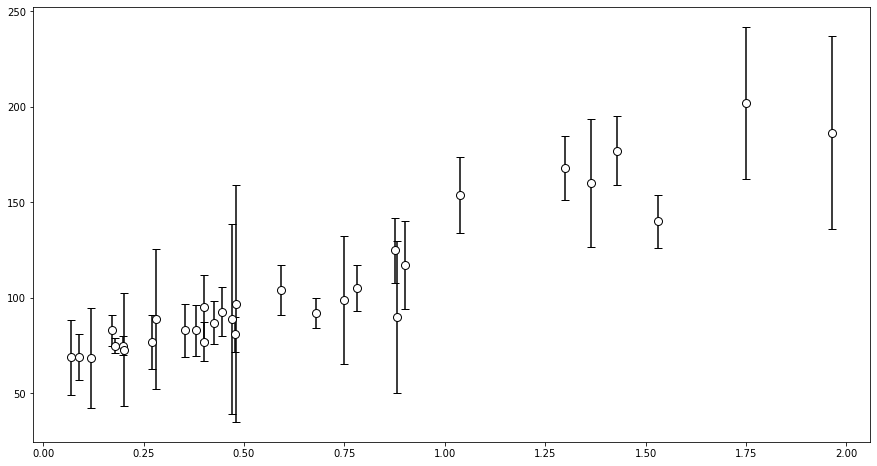

In [28]:
plt.rcParams['figure.figsize'] = (15,8)
plt.errorbar(z, H, sig, fmt='o', color='k', mfc='white', elinewidth=1.5, ms=8, capsize=4)

In [29]:
cov_mat_diag = np.zeros((len(z), len(z)), dtype='float64') 

for i in range(len(z)):
	cov_mat_diag[i,i] = sig[i]**2

imf_intp = np.interp(z, zmod, imf)/100
slib_intp = np.interp(z, zmod, slib)/100
sps_intp = np.interp(z, zmod, sps)/100
spsooo_intp = np.interp(z, zmod, spsooo)/100

cov_mat_imf = np.zeros((len(z), len(z)), dtype='float64')
cov_mat_slib = np.zeros((len(z), len(z)), dtype='float64')
cov_mat_sps = np.zeros((len(z), len(z)), dtype='float64')
cov_mat_spsooo = np.zeros((len(z), len(z)), dtype='float64')

for i in range(len(z)):
	for j in range(len(z)):
		cov_mat_imf[i,j] = H[i] * imf_intp[i] * H[j] * imf_intp[j]
		cov_mat_slib[i,j] = H[i] * slib_intp[i] * H[j] * slib_intp[j]
		cov_mat_sps[i,j] = H[i] * sps_intp[i] * H[j] * sps_intp[j]
		cov_mat_spsooo[i,j] = H[i] * spsooo_intp[i] * H[j] * spsooo_intp[j]

In [30]:
# The covarince matrix including all systematics is
cov_mat = cov_mat_spsooo+cov_mat_imf+cov_mat_diag
inv_cov_mat = inv(cov_mat)